In [1]:
import numpy as np
import numpy.random as random
import scipy as sp
from pandas import Series, DataFrame
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
%matplotlib inline

%precision 3

'%.3f'

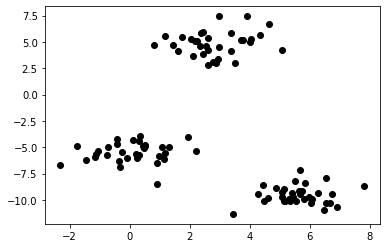

In [2]:
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

X, _ = make_blobs(random_state=10) # 回傳兩個array 不需要用的使用＿來接收
plt.scatter(X[:,0],X[:,1],color='black')


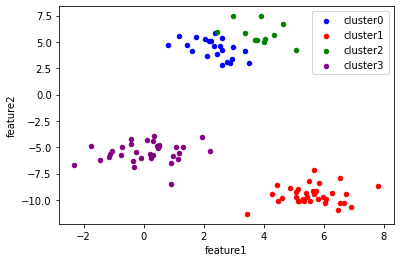

In [3]:
kmeans = KMeans(init='random', n_clusters=4) #KMeans資料初始化
kmeans.fit(X) #計算群體重心
y_pred = kmeans.predict(X) #預測群體編號

merge_data = pd.concat([pd.DataFrame(X[:,0]), pd.DataFrame(X[:,1]), pd.DataFrame(y_pred)], axis =1)
merge_data.columns = ['feature1','feature2','clusters'] #X軸為feature1,Y軸為feature2,全體編號為cluster

ax = None
colors = ['blue','red','green','purple']
for i,data in merge_data.groupby('clusters'):
  ax = data.plot.scatter(x='feature1', y='feature2', color=colors[i],
                         label=f'cluster{i}', ax=ax)


In [5]:
import requests, zipfile  
import io       

url='http://archive.ics.uci.edu/ml/machine-learning-databases/00222/bank.zip'
r=requests.get(url, stream =True)
z=zipfile.ZipFile(io.BytesIO(r.content))
z.extractall()

bank = pd.read_csv('bank.csv', sep = ';')

print('資料形式(X,Y): {}'.format(bank.shape))
print('缺失值數量: {}'.format(bank.isnull().sum().sum()))

資料形式(X,Y): (4521, 17)
缺失值數量: 0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   age       4521 non-null   int64
 1   balance   4521 non-null   int64
 2   campaign  4521 non-null   int64
 3   previous  4521 non-null   int64
dtypes: int64(4)
memory usage: 141.4 KB
2    2277
1     214
0    1389
5     161
4     420
3      60
Name: cluster_number, dtype: int64


Text(0, 0.5, 'count')

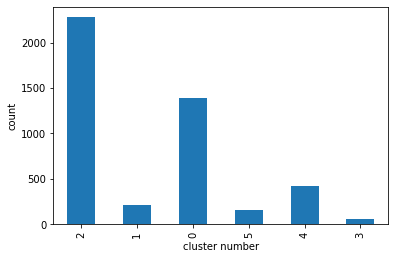

In [7]:
from sklearn.preprocessing import StandardScaler

bank_sub = bank[['age','balance','campaign','previous']]

sc = StandardScaler()
sc.fit(bank_sub)
bank_sub_std = sc.transform(bank_sub)
bank_sub.info()

kmeans = KMeans(init='random', n_clusters=6, random_state=0) #KMeans資料初始化
kmeans.fit(bank_sub_std) #計算群體重心
labels = pd.Series(kmeans.labels_, name = 'cluster_number') #將群體編號轉換為Series

print(labels.value_counts(sort=False))

ax = labels.value_counts(sort=False).plot(kind='bar')
ax.set_xlabel('cluster number')
ax.set_ylabel('count')


Text(0, 0.5, 'Distortion')

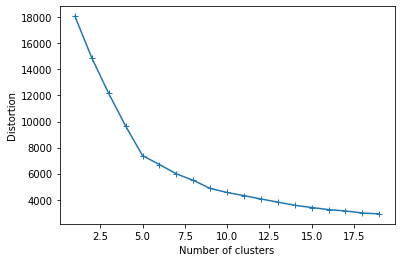

In [11]:
from matplotlib import markers
dist_list = []
for i in range(1,20):
  kmeans = KMeans(init='random', n_clusters=i, random_state=0) #KMeans資料初始化
  kmeans.fit(bank_sub_std) #計算群體重心
  dist_list.append(kmeans.inertia_)

plt.plot(range(1,20), dist_list, marker = '+')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')

Practice_1
1. 查輪廓係數(Silhouette analysis)
https://jimmy-huang.medium.com/kmeans%E5%88%86%E7%BE%A4%E6%BC%94%E7%AE%97%E6%B3%95-%E8%88%87-silhouette-%E8%BC%AA%E5%BB%93%E5%88%86%E6%9E%90-8be17e634589

In [12]:
bank_with_cluster = pd.concat([bank, labels], axis =1)
bank_with_cluster.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,cluster_number
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no,2
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no,1
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no,2
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no,2
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no,0


In [14]:
bins = [15,20,25,30,35,40,45,50,55,60,65,100]
qcut_age = pd.cut(bank_with_cluster.age, bins, right = False)
df = pd.concat([bank_with_cluster.cluster_number, qcut_age], axis =1)
cross_cluster_age = df.groupby(['cluster_number', 'age']).size().unstack().fillna(0)
cross_cluster_age

age,"[15, 20)","[20, 25)","[25, 30)","[30, 35)","[35, 40)","[40, 45)","[45, 50)","[50, 55)","[55, 60)","[60, 65)","[65, 100)"
cluster_number,,,,,,,,,,,
0,0,0,0,0,0,83,442,351,354,81,78
1,0,3,18,54,42,34,24,24,10,1,4
2,3,51,359,823,650,391,0,0,0,0,0
3,1,1,7,13,14,8,8,6,2,0,0
4,0,4,24,74,83,86,72,47,28,1,1
5,0,4,7,26,29,36,19,15,17,2,6


In [15]:
hist_age = pd.value_counts(qcut_age)
hist_age

[30, 35)     990
[35, 40)     818
[40, 45)     638
[45, 50)     565
[50, 55)     443
[25, 30)     415
[55, 60)     411
[65, 100)     89
[60, 65)      85
[20, 25)      63
[15, 20)       4
Name: age, dtype: int64

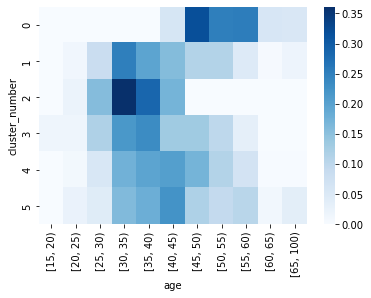

In [17]:
sns.heatmap(cross_cluster_age.apply(lambda x: x/x.sum(), axis =1), cmap = 'Blues')

In [20]:
cross_cluster_job = bank_with_cluster.groupby(['cluster_number', 'job']).size().unstack().fillna(0)
cross_cluster_job

job,admin.,blue-collar,entrepreneur,housemaid,management,retired,self-employed,services,student,technician,unemployed,unknown
cluster_number,,,,,,,,,,,,
0,126.0,271.0,58.0,59.0,262.0,198.0,53.0,102.0,0.0,194.0,46.0,20.0
1,26.0,42.0,8.0,3.0,42.0,8.0,8.0,16.0,8.0,46.0,5.0,2.0
2,255.0,509.0,79.0,33.0,497.0,6.0,92.0,246.0,65.0,419.0,65.0,11.0
3,2.0,14.0,1.0,0.0,18.0,1.0,6.0,7.0,1.0,7.0,3.0,0.0
4,58.0,90.0,14.0,7.0,98.0,7.0,18.0,36.0,4.0,76.0,7.0,5.0
5,11.0,20.0,8.0,10.0,52.0,10.0,6.0,10.0,6.0,26.0,2.0,0.0


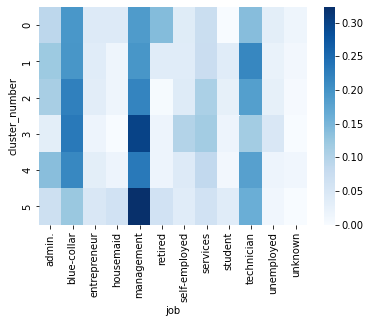

In [21]:
sns.heatmap(cross_cluster_job.apply(lambda x: x/x.sum(), axis =1), cmap = 'Blues')

Practice_2
1. k-means屬於Non-hierarchical method，想要使用Hierarchical method可以使用sklearn.cluster中的AgglomerativeClustering，並使用dendrogram
2. k-means屬於硬式聚類分析(Hard clustering)，每一個資料都有獨一無二的群體編號，軟式聚類(Fuzzy clustering)則是給予每個資料賦予群體編號的機率，可以使用sklearn.mixture中的GuassianMixture
3. 設定make_blobs中random_state=52並繪圖看能夠分成幾群
4. 將bank_sub_std分成4 or 8 clusters進行分析，看分群後的資料差異，或是選擇其他變數

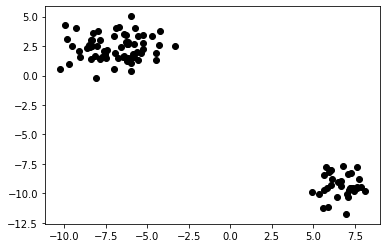

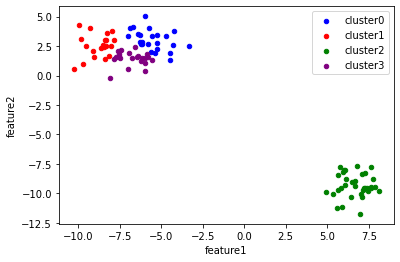

In [23]:
X, _ = make_blobs(random_state=52) 
plt.scatter(X[:,0],X[:,1],color='black')

kmeans = KMeans(init='random', n_clusters=4) #KMeans資料初始化
kmeans.fit(X) #計算群體重心
y_pred = kmeans.predict(X) #預測群體編號

merge_data = pd.concat([pd.DataFrame(X[:,0]), pd.DataFrame(X[:,1]), pd.DataFrame(y_pred)], axis =1)
merge_data.columns = ['feature1','feature2','clusters'] #X軸為feature1,Y軸為feature2,全體編號為cluster

ax = None
colors = ['blue','red','green','purple']
for i,data in merge_data.groupby('clusters'):
  ax = data.plot.scatter(x='feature1', y='feature2', color=colors[i],
                         label=f'cluster{i}', ax=ax)

3    2529
0     221
2    1590
1     181
Name: cluster_number, dtype: int64


Text(0, 0.5, 'count')

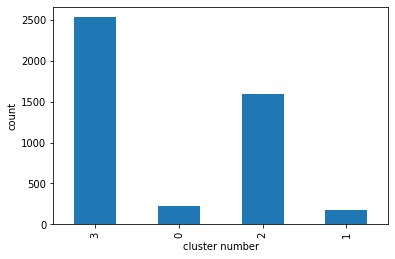

In [24]:
kmeans = KMeans(init='random', n_clusters=4, random_state=0) #KMeans資料初始化
kmeans.fit(bank_sub_std) #計算群體重心
labels = pd.Series(kmeans.labels_, name = 'cluster_number') #將群體編號轉換為Series

print(labels.value_counts(sort=False))

ax = labels.value_counts(sort=False).plot(kind='bar')
ax.set_xlabel('cluster number')
ax.set_ylabel('count')

# Principal component analysis

相關係數0.889:


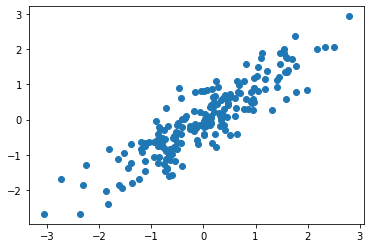

In [25]:
from sklearn.preprocessing import StandardScaler

sample = np.random.RandomState(1)

X = np.dot(sample.rand(2,2), sample.randn(2,200)).T

sc = StandardScaler()
X_std = sc.fit_transform(X)

print('相關係數{:.3f}:'.format(sp.stats.pearsonr(X_std[:,0],X_std[:,1])[0]))
plt.scatter(X_std[:,0],X_std[:,1])

In [30]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca.fit(X_std)

print(pca.components_) #屬性(特徵向量)
print(pca.explained_variance_) #standarized後變異數為1，有兩個components
print(pca.explained_variance_ratio_)

[[-0.707 -0.707]
 [-0.707  0.707]]
[1.899 0.111]
[0.945 0.055]


(-3.3534087054527717,
 3.079070151762556,
 -2.9610077757452697,
 3.2159825436132246)

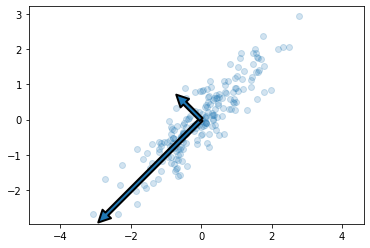

In [33]:
from matplotlib.patches import ArrowStyle
arrowprops = dict(ArrowStyle='->',
                  linewidth=2,
                  shrinkA=0, shrinkB=0)

def draw_vector(v0, v1):
  plt.gca().annotate('', v1, v0, arrowprops = arrowprops)

plt.scatter(X_std[:,0],X_std[:,1], alpha=0.2)
for length, vector in zip(pca.explained_variance_, pca.components_):
  v=vector*3*np.sqrt(length)
  draw_vector(pca.mean_, pca.mean_ + v)

plt.axis('equal')

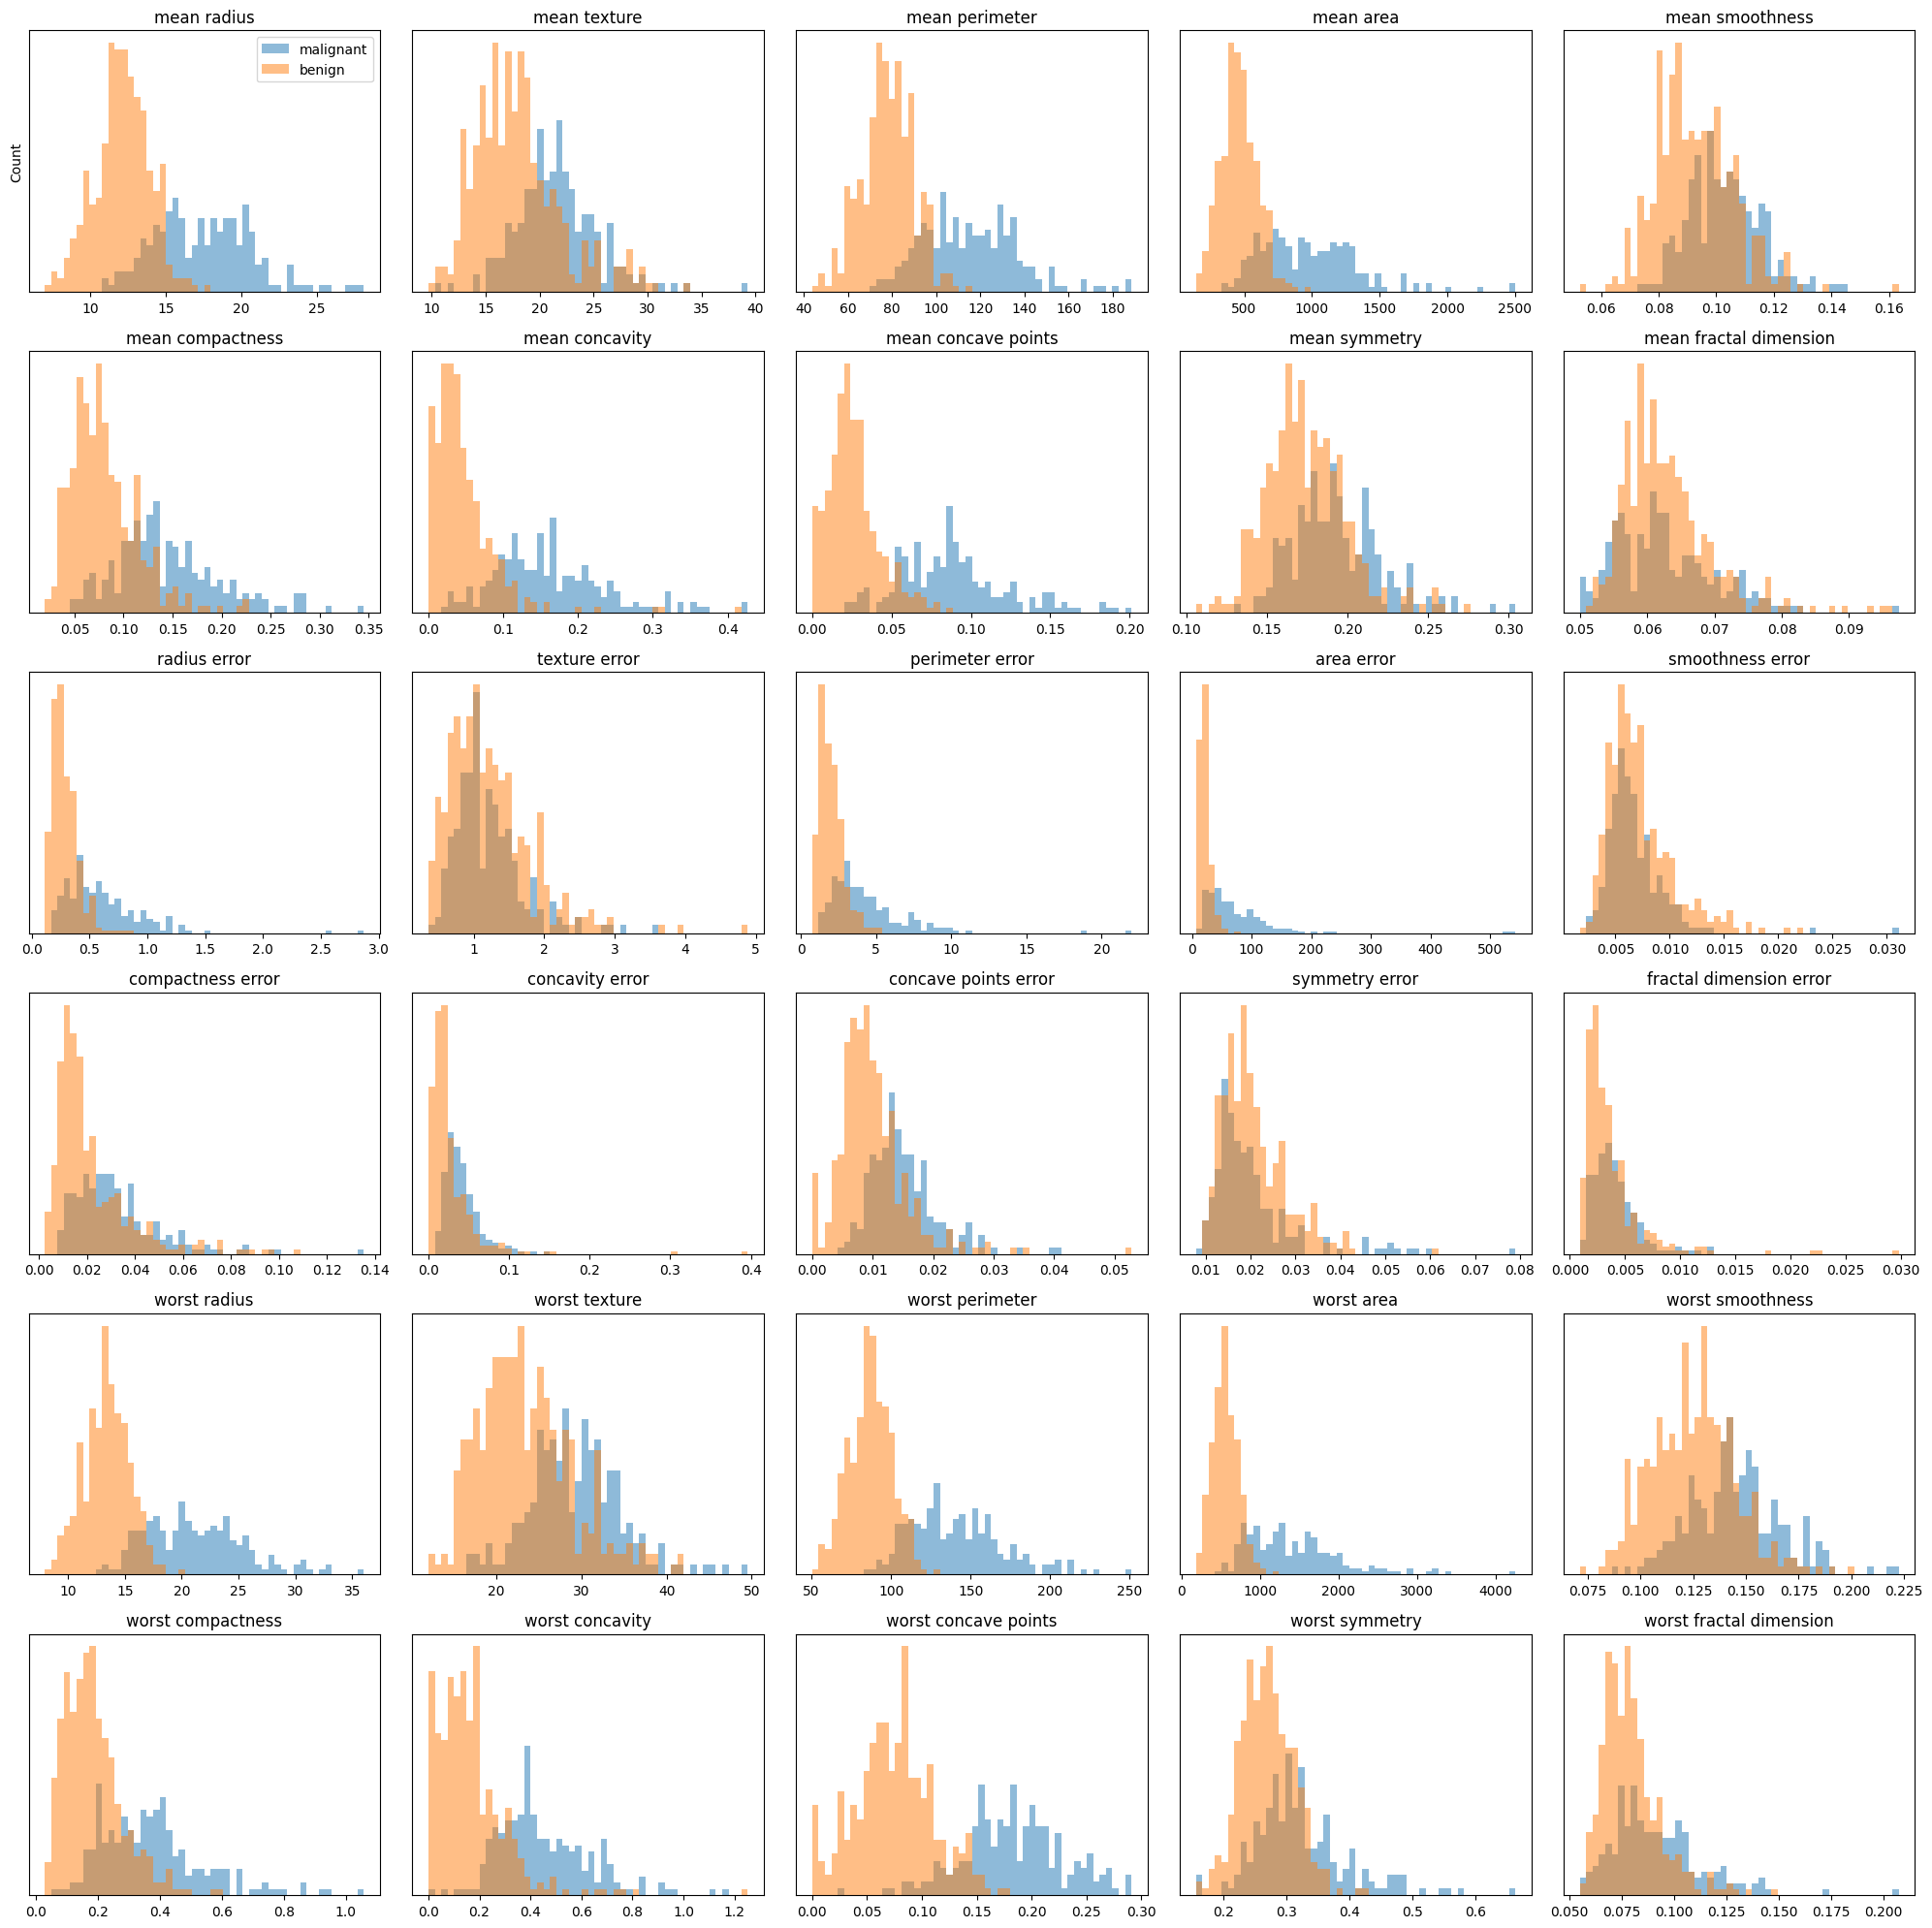

In [54]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

malignant = cancer.data[cancer.target == 0]
benign = cancer.data[cancer.target == 1]

fig, axes = plt.subplots(6,5,figsize=(20,20))
ax = axes.ravel()

for i in range(30):
  _,bins = np.histogram(cancer.data[:,i], bins=50)
  ax[i].hist(malignant[:,i], bins, alpha=.5)
  ax[i].hist(benign[:,i], bins, alpha=.5)
  ax[i].set_title(cancer.feature_names[i])
  ax[i].set_yticks(())

ax[0].set_ylabel('Count')
ax[0].legend(['malignant', 'benign'], loc = 'best')
fig.tight_layout()

In [57]:
sc=StandardScaler()
X_std = sc.fit_transform(cancer.data)

pca = PCA(n_components=2)
pca.fit(X_std)
X_pca = pca.transform(X_std)

print('X_pca shape: {}'.format(X_pca.shape)) 
print('Explained variance ratio: {}'.format(pca.explained_variance_ratio_))

X_pca shape: (569, 2)
Explained variance ratio: [0.443 0.19 ]


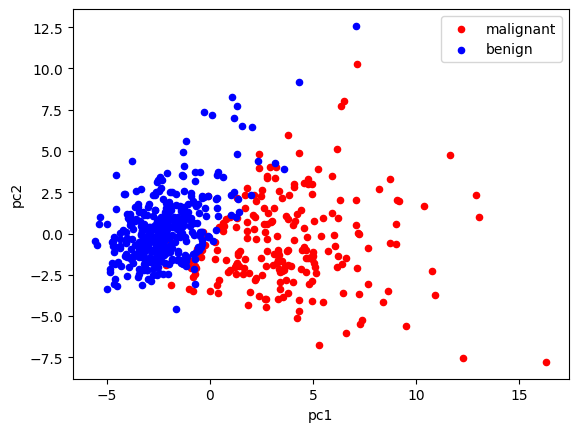

In [61]:
X_pca = pd.DataFrame(X_pca, columns=['pc1','pc2'])
X_pca = pd.concat([X_pca, pd.DataFrame(cancer.target, columns=['target'])], axis=1)
pca_malignant = X_pca[X_pca['target']==0]
pca_benign = X_pca[X_pca['target']==1]

ax = pca_malignant.plot.scatter(x='pc1', y='pc2', color='red', label='malignant')
pca_benign.plot.scatter(x='pc1', y='pc2', color='blue', label='benign',ax=ax)

Practice_3
1. 使用iris dataset進行iris.target主成分分析(PCA component = 2)

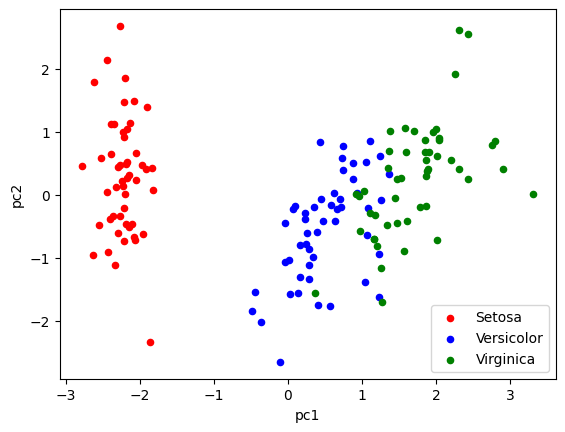

In [65]:
from sklearn import datasets

iris = datasets.load_iris()

X = iris.data
Y = iris.target

sc=StandardScaler()
X_std = sc.fit_transform(X)

pca = PCA(n_components=2)
pca.fit(X_std)
X_pca = pca.transform(X_std)

X_pca = pd.DataFrame(X_pca, columns=['pc1','pc2'])
X_pca = pd.concat([X_pca, pd.DataFrame(iris.target, columns=['target'])], axis=1)
pca_Setosa = X_pca[X_pca['target']==0]
pca_Versicolor = X_pca[X_pca['target']==1]
pca_Virginica = X_pca[X_pca['target']==2]

ax = pca_Setosa.plot.scatter(x='pc1', y='pc2', color='red', label='Setosa')
pca_Versicolor.plot.scatter(x='pc1', y='pc2', color='blue', label='Versicolor',ax=ax)
pca_Virginica.plot.scatter(x='pc1', y='pc2', color='green', label='Virginica',ax=ax)